In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

**EXERCISE 01: HANDS-ON PERCEPTRON**

A dataset based on OR logic gate

In [2]:
# Create Dataset
x = pd.DataFrame([[0, 0], [0, 1], [1, 0], [1, 1]], columns = ['x1', 'x2'])
target = pd.DataFrame([0, 1, 1, 1])

In [ ]:
x.head()

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [3]:
# Create model and train it
percep_model = Perceptron()
percep_model.fit(x, target)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron()

In [4]:
# Model score
percep_model.score(x, target)

1.0

In [5]:
# Make some trials
x_gen  = pd.DataFrame([[0.5, -1], [0.0, 0.5], [-10, 1]], columns=['x1', 'x2'])
y_pred = percep_model.predict(x_gen) 

In [6]:
# Look at result
y_pred

array([0, 0, 0])

**Decision Boundary**

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with

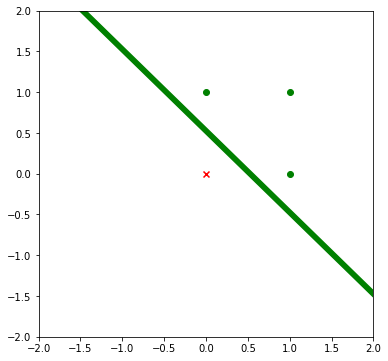

In [ ]:
# Create instances for x axis and y axis
len_size  = 50
x1_range  = np.linspace(-2, 2, len_size).reshape(len_size, 1)
x2_range  = np.linspace(-2, 2, len_size).reshape(len_size, 1)
pred_val  = np.zeros((len_size, len_size))

# Combine every x-y and make prediction to finally classify them
for i in range(len_size):
  for j in range(len_size):
    pred_val[i, j] = percep_model.predict([[x1_range[i, 0], x2_range[j, 0]]]).max()

# Create meshgrid and plot decision boundary for clusters
plt.figure(figsize = [6, 6])
mesh_l, mesh_w = np.meshgrid(x1_range, x2_range)
contour_set = plt.contour(mesh_l, mesh_w, pred_val.T, colors = 'green')

# Plot the data that is used to train
plt.scatter(x['x1'][target[0]==1], x['x2'][target[0]==1], marker='o', color='green')    # The case of 1
plt.scatter(x['x1'][target[0]==0], x['x1'][target[0]==0], marker='x', color='red')      # The case of 0
plt.show()

Test with another set based on Logic Gate

In [8]:
# Create another set of data
x_other = pd.DataFrame([[-0.5, -0.5], [-0.5, 0.5], [0.3, -0.5], [-0.1, 1.0]])
y_other = pd.DataFrame([1, 1, 0, 0])

# Create model and train it
percep_model_other = Perceptron()
percep_model_other.fit(x_other, y_other)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron()

In [9]:
# Evaluate model
percep_model_other.score(x_other, y_other)

1.0

In [10]:
# Test some instances with the decision boundary
x1_test = np.arange(-1, 1, 0.05).reshape(1, 40)
x2_test = x1_test**2 + np.random.rand(1,40)
x_test_combined = np.array([x1_test, x2_test]).reshape(2, 40)
x_test_boundary = pd.DataFrame(x_test_combined).T

In [11]:
x_test_boundary.head()

,0,1
0,-1.00,1.353420
1,-0.95,1.630735
2,-0.90,1.101914
3,-0.85,1.593548
4,-0.80,1.363619


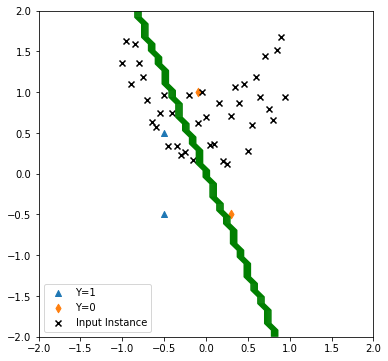

In [12]:
# Create instances for x axis and y axis
len_size = 50
x1_range_other  = np.linspace(-2, 2, len_size).reshape(len_size, 1)
x2_range_other  = np.linspace(-2, 2, len_size).reshape(len_size, 1)
pred_val_other  = np.zeros((len_size, len_size))


# Combine every x-y and make prediction to finally classify them
for i in range(len_size):
  for j in range(len_size):
    pred_val_other[i, j] = percep_model_other.predict([[x1_range_other[i, 0], x2_range_other[j, 0]]]).max()

# Create meshgrid and plot decision boundary for clusters
plt.figure(figsize = [6, 6])
plt.scatter(x_other[0][y_other[0]==1], x_other[1][y_other[0]==1], marker = '^')
plt.scatter(x_other[0][y_other[0]==0], x_other[1][y_other[0]==0], marker = 'd')
plt.scatter(x_test_boundary[0], x_test_boundary[1], marker = 'x', color='black')

plt.legend(['Y=1', 'Y=0', 'Input Instance'])
mesh_l, mesh_w = np.meshgrid(x1_range_other, x2_range_other)
contour_set = plt.contour(mesh_l, mesh_w, pred_val_other.T, colors = 'green')
plt.show()

In [13]:
####### DECISION BOUNDARY CREATING FUNCTION #######
def decisionBoundary(min1, max1, min2, max2, lensize, trained_model):
  len_size = lensize
  x1_range_other  = np.linspace(min1, max1, len_size).reshape(len_size, 1)
  x2_range_other  = np.linspace(min2, max2, len_size).reshape(len_size, 1)
  pred_val_other  = np.zeros((len_size, len_size))

  # Combine every x-y and make prediction to finally classify them
  for i in range(len_size):
    for j in range(len_size):
      pred_val_other[i, j] = trained_model.predict([[x1_range_other[i, 0], x2_range_other[j, 0]]]).max()

  # Create meshgrid and plot decision boundary for clusters
  plt.figure(figsize = [12, 12])
  plt.legend(['Y=1', 'Y=0', 'Input Instance'])
  mesh_l, mesh_w = np.meshgrid(x1_range_other, x2_range_other)
  contour_set = plt.contour(mesh_l, mesh_w, pred_val_other.T, colors = 'green')

**EXERCISE 02: IRIS CLASSIFIERS**

In [14]:
# Import data and tools from library
from sklearn import datasets 
from sklearn.metrics import accuracy_score            # For evaluation
from sklearn.linear_model import Perceptron           # For model creating
from sklearn.model_selection import train_test_split  # For dataset splitting
from sklearn.preprocessing import StandardScaler      # For dataset normalization

In [15]:
# Store Iris dataset
iris_data = datasets.load_iris()

# Have a look at dataset
list(iris_data.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [16]:
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
# Create dataset
iris_dataframe = pd.DataFrame(iris_data['data'], columns = iris_data['feature_names'])
iris_class     = pd.DataFrame(iris_data['target'], columns = ['target'])

In [18]:
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
iris_class.head()

,target
0,0
1,0
2,0
3,0
4,0


<Axes: >

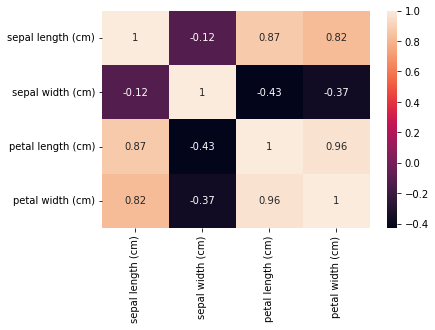

In [20]:
import seaborn as sns   # Seaborn for the machine learning - oriented visualization

# Feature Correlation
correlation = iris_dataframe.corr()
sns.heatmap(correlation, annot = True)

The high correlation of petal width and petal length makes it easier to predict one based on the other

**IRIS CLASSIFIER BASED ON 2 CATEGORIES**

Set of: Petal Length - Petal Width

In [21]:
# Consider the classifier based on the dataset of petal size
x_petaldata = iris_dataframe[['petal length (cm)', 'petal width (cm)']]
x_petaldata.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [22]:
# Two ways for the target
# y_target = iris_data.target
# Or
y_target = iris_class

**HOW TO ENCODE YOUR CLASSES**

In [36]:
# The target insights
num_of_class = y_target['target'].unique().shape[0]
num_of_instn = y_target.shape[0]

# Create an emty target classes
y_encoded_target = pd.DataFrame(np.zeros((num_of_instn, num_of_class)), columns=['Class 1', 'Class 2', 'Class 3'])

In [41]:
# Encoding classes
y_encoded_target['Class 1'][y_target['target']==0] = 1    # Find and replace the instances that match the condition with 1.0
y_encoded_target['Class 2'][y_target['target']==1] = 1
y_encoded_target['Class 3'][y_target['target']==2] = 1

In [43]:
y_encoded_target.head()   # Sucessfully encoded

,Class 1,Class 2,Class 3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


The above code only shows how to encode your data, however in this case needs no use of it

In [84]:
# Train-Test split
x_iris_train, x_iris_test, y_iris_train, y_iris_test = train_test_split(x_petaldata, y_target, test_size=0.3)

percep_iris_simp = Perceptron(max_iter=590, eta0=0.05, random_state=0)
percep_iris_simp.fit(x_iris_train, y_iris_train)   # Train the model to make predictions of 3 class

# Model evaluation
train_score = percep_iris_simp.score(x_iris_train, y_iris_train)
test_score  = percep_iris_simp.score(x_iris_test, y_iris_test)

# Print out score
print("Train score:", train_score)
print("Test score:", test_score)

Train score: 0.8952380952380953
Test score: 0.8444444444444444


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Decision Boundary Plotting**

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

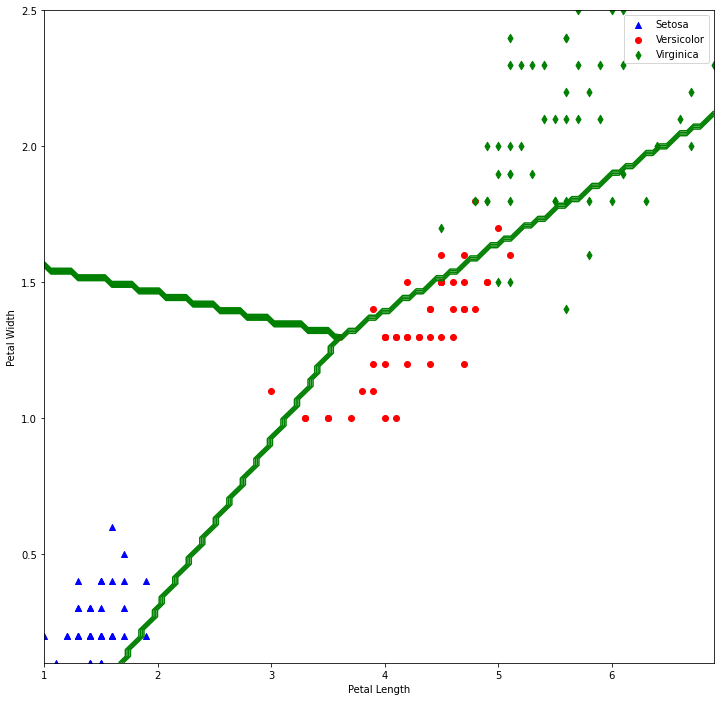

In [86]:
# Find limits
min_length = np.amin(x_petaldata['petal length (cm)'])
max_length = np.amax(x_petaldata['petal length (cm)'])
min_width  = np.amin(x_petaldata['petal width (cm)'])
max_width  = np.amax(x_petaldata['petal width (cm)'])

# Make Plot
decisionBoundary(min_length, max_length, min_width, max_width, 100, percep_iris_simp)

# Plot original data
plt.scatter(iris_dataframe['petal length (cm)'][iris_class['target'] == 0], iris_dataframe['petal width (cm)'][iris_class['target'] == 0], marker='^', color = 'blue')
plt.scatter(iris_dataframe['petal length (cm)'][iris_class['target'] == 1], iris_dataframe['petal width (cm)'][iris_class['target'] == 1], marker='o', color = 'red')
plt.scatter(iris_dataframe['petal length (cm)'][iris_class['target'] == 2], iris_dataframe['petal width (cm)'][iris_class['target'] == 2], marker='d', color = 'green')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(['Setosa', 'Versicolor', 'Virginica'])
plt.show()

Next, let's consider one more set of two categories sepal length - petal length

Set of: Sepal Length - Petal Length

In [87]:
# Consider the classifier based on the dataset of petal size
x_set2 = iris_dataframe[['sepal length (cm)', 'petal length (cm)']]
x_set2.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [109]:
# Train-Test split
x_iris_train, x_iris_test, y_iris_train, y_iris_test = train_test_split(x_set2, y_target, test_size=0.3)

percep_iris_set2 = Perceptron(max_iter=2600, eta0=0.1, random_state=0)    # Set 2 of: Sepal and Petal Length
percep_iris_set2.fit(x_iris_train, y_iris_train)   # Train the model to make predictions of 3 class

# Model evaluation
train_score = percep_iris_set2.score(x_iris_train, y_iris_train)
test_score  = percep_iris_set2.score(x_iris_test, y_iris_test)

# Print out score
print("Train score:", train_score)
print("Test score:", test_score)

Train score: 0.9428571428571428
Test score: 0.8888888888888888


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**DECISION BOUNDARY PLOTTING**

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

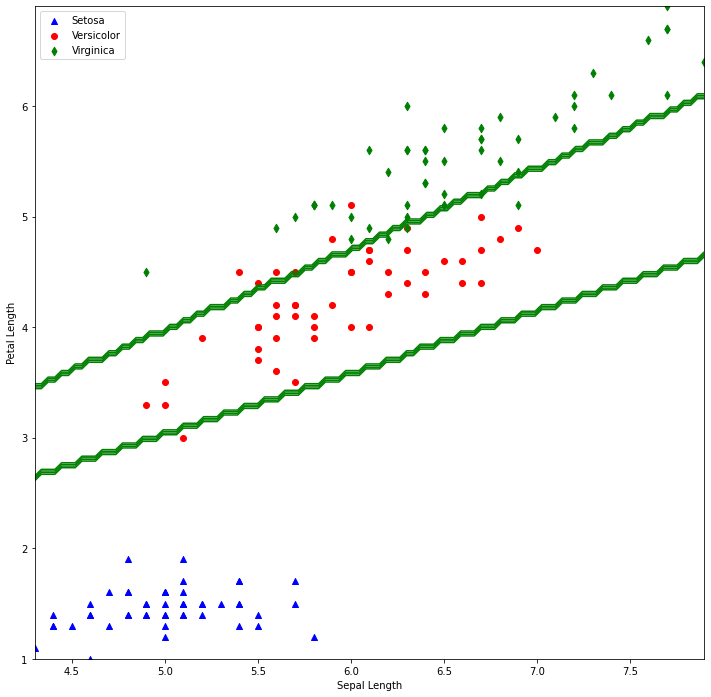

In [110]:
# Find limits
min_length = np.amin(x_set2['sepal length (cm)'])
max_length = np.amax(x_set2['sepal length (cm)'])
min_width  = np.amin(x_set2['petal length (cm)'])
max_width  = np.amax(x_set2['petal length (cm)'])

# Make Plot
decisionBoundary(min_length, max_length, min_width, max_width, 100, percep_iris_set2)

# Plot original data
plt.scatter(iris_dataframe['sepal length (cm)'][iris_class['target'] == 0], iris_dataframe['petal length (cm)'][iris_class['target'] == 0], marker='^', color = 'blue')
plt.scatter(iris_dataframe['sepal length (cm)'][iris_class['target'] == 1], iris_dataframe['petal length (cm)'][iris_class['target'] == 1], marker='o', color = 'red')
plt.scatter(iris_dataframe['sepal length (cm)'][iris_class['target'] == 2], iris_dataframe['petal length (cm)'][iris_class['target'] == 2], marker='d', color = 'green')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(['Setosa', 'Versicolor', 'Virginica'])

**IRIS CLASSIFIER BASED ON 5 CATEGORIES**

In [111]:
# Another way to create dataset
x_iris   = iris_data.data
y_target = iris_data.target

In [123]:
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [112]:
# Split data set
x_iris_train, x_iris_test, y_iris_train, y_iris_test = train_test_split(x_iris, y_target, test_size=0.3)

# Create scaler and do the normalization
std_scale = StandardScaler()

  # Scale the train set
x_stdscl_train = std_scale.fit_transform(x_iris_train)
x_stdscl_test  = std_scale.fit_transform(x_iris_test)

In [113]:
# The unscaled set
x_iris_train[:5]

array([[5.5, 2.4, 3.7, 1. ],
       [6.5, 2.8, 4.6, 1.5],
       [4.6, 3.4, 1.4, 0.3],
       [6.3, 2.3, 4.4, 1.3],
       [6.5, 3. , 5.8, 2.2]])

In [114]:
# The scaled set
x_stdscl_train[:5]

array([[-0.43088949, -1.57175249, -0.00648217, -0.24213631],
       [ 0.81892808, -0.67238458,  0.50398898,  0.41312948],
       [-1.5557253 ,  0.67666729, -1.31101957, -1.15950842],
       [ 0.56896457, -1.79659447,  0.39055095,  0.15102316],
       [ 0.81892808, -0.22270063,  1.18461719,  1.33050159]])

In [115]:
# Create model to train
percep_iris = Perceptron(max_iter=100, eta0=0.01, random_state=0)
percep_iris.fit(x_stdscl_train, y_iris_train)   # Train the model to make predictions of 3 class

Perceptron(eta0=0.01, max_iter=100)

In [116]:
# Evaluate on test set
y_iris_pred = percep_iris.predict(x_stdscl_test)

# Results
print("Model's Accuracy:", accuracy_score(y_iris_test, y_iris_pred))

Model's Accuracy: 0.8


In [119]:
# Model evaluation
train_score = percep_iris.score(x_stdscl_train, y_iris_train)
test_score  = percep_iris.score(x_stdscl_test, y_iris_test)

# Print out score
print("Train score:", train_score)
print("Test score:", test_score)

Train score: 0.8666666666666667
Test score: 0.8


**EXERCISE 03: CRAB SEX CLASSIFIER**

In [ ]:
# Load data from file
file_path = '/content/crabs.csv'
crab_raw  = pd.read_csv(file_path)

# Review data
crab_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   speies     200 non-null    object 
 1   sex        200 non-null    object 
 2   index      200 non-null    int64  
 3   fontallip  200 non-null    float64
 4   rearwidth  200 non-null    float64
 5   length     200 non-null    float64
 6   width      200 non-null    float64
 7   depth      200 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 12.6+ KB


In [ ]:
crab_raw.head()

,speies,sex,index,fontallip,rearwidth,length,width,depth
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2


The next work will handle crab sex classification task with the 'B' species. The Female is encoded 0 and Male is encoded 1. The task is conducted based on 5 features as shown above

In [ ]:
# Creat dataset
crab_featureset = crab_raw[crab_raw['speies']=='B'].drop(['speies', 'sex', 'index'], axis=True)
crab_target     = pd.DataFrame(crab_raw[crab_raw['speies']=='B'].drop(['speies', 'index', 'fontallip',	'rearwidth',	'length',	'width',	'depth'], axis=True))   # Will be encoded
crab_sextarget  = pd.DataFrame(crab_raw[crab_raw['speies']=='B'].drop(['speies', 'index', 'fontallip',	'rearwidth',	'length',	'width',	'depth'], axis=True))   # Won't be encoded

In [ ]:
crab_featureset.shape

(100, 5)

In [ ]:
# Set of features
crab_featureset.head()

,fontallip,rearwidth,length,width,depth
0,8.1,6.7,16.1,19.0,7.0
1,8.8,7.7,18.1,20.8,7.4
2,9.2,7.8,19.0,22.4,7.7
3,9.6,7.9,20.1,23.1,8.2
4,9.8,8.0,20.3,23.0,8.2


In [ ]:
# Set of target
crab_target.head()

,sex
0,M
1,M
2,M
3,M
4,M


In [ ]:
crab_target.shape

(100, 1)

In [ ]:
# Encode the target set
crab_target[crab_target['sex'] == 'M'] = 1
crab_target[crab_target['sex'] == 'F'] = 0

In [ ]:
crab_target.head()

,sex
0,1
1,1
2,1
3,1
4,1


In [ ]:
# Scaling down data
std_crabscale    = StandardScaler()
crab_feature_scl = std_crabscale.fit_transform(crab_featureset)

# Split data set
x_crab_train, x_crab_test, target_sex_train, target_sex_test = train_test_split(crab_feature_scl, crab_target, test_size=0.3)

In [ ]:
x_crab_train = np.array(x_crab_train)
x_crab_train.shape

(70, 5)

In [ ]:
target_sex_train = np.array(target_sex_train, np.intc)
target_sex_train.shape

(70, 1)

In [ ]:
x_crab_test     = np.array(x_crab_test)
target_sex_test = np.array(target_sex_test, np.intc)

In [ ]:
# Create model and train
percep_crab = Perceptron(max_iter=100, eta0=0.01, random_state=0)
percep_crab.fit(x_crab_train, target_sex_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(eta0=0.01, max_iter=100)

In [ ]:
# Evaluate model
target_sex_pred = percep_crab.predict(x_crab_test)
print("Model's Accuracy:", accuracy_score(target_sex_test, target_sex_pred))

Model's Accuracy: 0.9


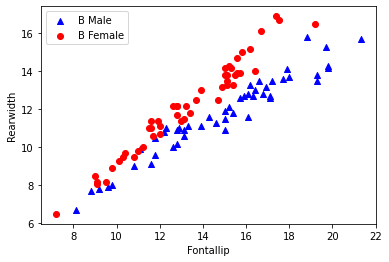

In [ ]:
# Clusters plotting
plt.scatter(crab_featureset['fontallip'][crab_sextarget['sex'] == 'M'], crab_featureset['rearwidth'][crab_sextarget['sex'] == 'M'], marker='^', color = 'blue')
plt.scatter(crab_featureset['fontallip'][crab_sextarget['sex'] == 'F'], crab_featureset['rearwidth'][crab_sextarget['sex'] == 'F'], marker='o', color = 'red')
plt.legend(['B Male', 'B Female'])
plt.xlabel('Fontallip')
plt.ylabel('Rearwidth')
plt.show()

**EXERCISE 04: CRAB TYPES CLASSIFIER**

In [ ]:
# Creat dataset
crab_featureset2 = crab_raw.drop(['speies', 'sex', 'index'], axis=True)
crab_encodetype  = pd.DataFrame(crab_raw['speies'])  # Will be encoded
crab_typetarget  = pd.DataFrame(crab_raw['speies'])  # Won't be encoded

In [ ]:
# Set of features
crab_featureset2.head()

,fontallip,rearwidth,length,width,depth
0,8.1,6.7,16.1,19.0,7.0
1,8.8,7.7,18.1,20.8,7.4
2,9.2,7.8,19.0,22.4,7.7
3,9.6,7.9,20.1,23.1,8.2
4,9.8,8.0,20.3,23.0,8.2


In [ ]:
# Set of targets
crab_typetarget.head()

,speies
0,B
1,B
2,B
3,B
4,B


In [ ]:
# Encode targets: B type = 1; O type = 0
crab_encodetype[crab_encodetype == 'B'] = 1
crab_encodetype[crab_encodetype == 'O'] = 0

crab_encodetype = pd.to_numeric(crab_encodetype['speies'])

In [ ]:
# Scaling down data
std_crabscale     = StandardScaler()
crab_feature_scl2 = std_crabscale.fit_transform(crab_featureset2)

# Split data set
x_crab_train2, x_crab_test2, target_type_train, target_type_test = train_test_split(crab_feature_scl2, crab_encodetype, test_size=0.3)

In [ ]:
# Create model and train
percep_crabtype = Perceptron(max_iter=100, eta0=0.01, random_state=0)
percep_crabtype.fit(x_crab_train2, target_type_train)

Perceptron(eta0=0.01, max_iter=100)

In [ ]:
# Evaluate model
target_type_pred = percep_crabtype.predict(x_crab_test2)
print("Model's Accuracy:", accuracy_score(target_type_test, target_type_pred))

Model's Accuracy: 0.9833333333333333


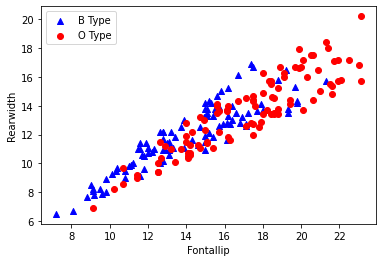

In [ ]:
# Clusters plotting
plt.scatter(crab_featureset2['fontallip'][crab_typetarget['speies'] == 'B'], crab_featureset2['rearwidth'][crab_typetarget['speies'] == 'B'], marker='^', color = 'blue')
plt.scatter(crab_featureset2['fontallip'][crab_typetarget['speies'] == 'O'], crab_featureset2['rearwidth'][crab_typetarget['speies'] == 'O'], marker='o', color = 'red')
plt.legend(['B Type', 'O Type'])
plt.xlabel('Fontallip')
plt.ylabel('Rearwidth')
plt.show()